# Filtros espaciales
OpenCV dispone de un conjunto de filtros espaciales ya implementados.
Además, dispone de la función genérica `filter2D` que permite aplicar cualquier filtro espacial a una imagen.

## Media

El filtro de medias se puede aplicar con la función `blur`. Esta función recibe como parámetros la imagen de entrada y el tamaño de filtro a aplicar (positivo e impar).



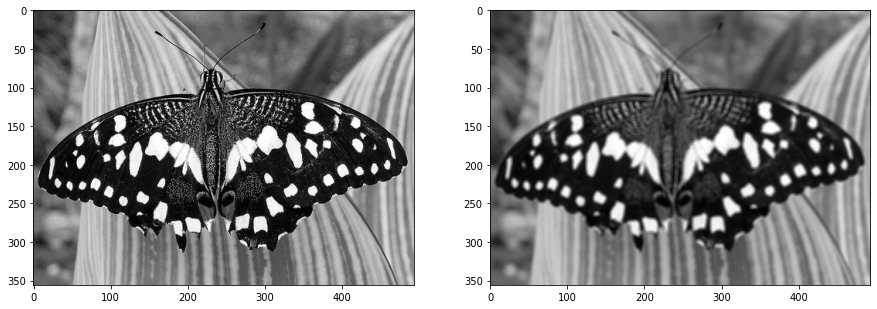

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]


im = cv2.imread('res/butterfly.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.blur(im,(5,5)) # Filtro de medias de tamaño 5x5

f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(blur, cmap='gray')
plt.show()

### Ejercicio
Aplica a la imagen `butterfly.jpg` filtros de medias de tamaño 3x3 y 9x9. Qué diferencias se aprecian?

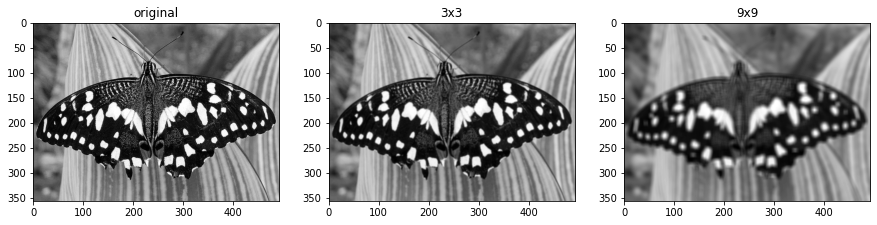

In [4]:
plt.rcParams["figure.figsize"] = [15,10]

# Aplicación del filtro de medias de tamaño 3x3 y tamaño 9x9:
filtro_3x3 = cv2.blur(im,(3,3))
filtro_9x9 = cv2.blur(im,(9,9))

# Visualización de resultados:
f, ax = plt.subplots(1,3)
ax[0].imshow(im, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(filtro_3x3, cmap='gray')
ax[1].set_title('3x3')
ax[2].imshow(filtro_9x9, cmap='gray')
ax[2].set_title('9x9')
plt.show()


Los resultados obtenidos muestran una tendencia en la que a medida que se incrementa el tamaño del filtro de medias, incrementa notablemente el suavizado de la imagen,
es decir, se reduce ruido en la imagen, incrementando a la vez la uniformidad en la imagen, de ahí que con el filtro 9x9, la imagen obtenida esté difuminada.

## Gaussiana
La función `GaussianBlur` aplica un suavizado gaussiano a la imagen. Esta función recibe tres o cuatro parámetros: 
- La imagen de entrada.
- El tamaño del filtro (positivo e impar)
- Desviación típica en la dirección X
- Desviación típica en la dirección Y. 

Si sólo se indica un valor de desviación típica, este valor se aplica tanto a X como a Y. Si, además, este valor es 0, la desviación típica se calculará automáticamente a partir del tamaño del kernel.

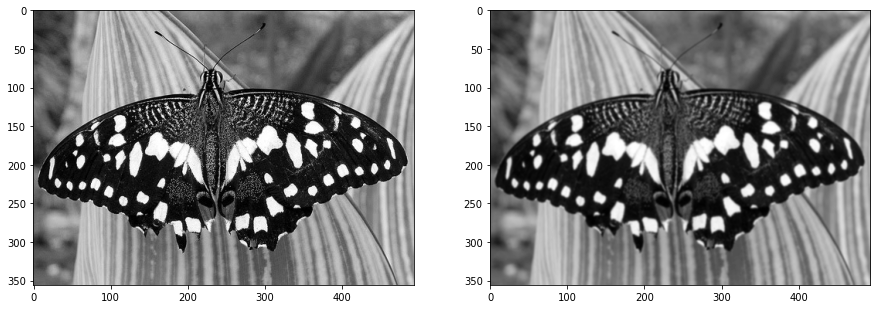

In [5]:
gaus = cv2.GaussianBlur(im, (5,5), 0)
f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(gaus, cmap='gray')
plt.show()

### Ejercicio
Compara la salida de aplicar a la imagen `butterfly.jpg`un filtro de medias de 11x11 y un filtro gaussiando del mismo tamaño (usar 0 como parámetro de desviación típica). Cuál de los dos filtros ofrece un mejor resultado?

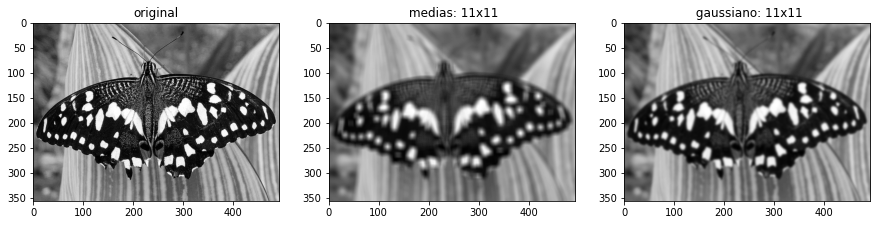

In [6]:
# Aplicación del filtro de medias 11x11 y gaussiano del mismo tamaño:
filtro_11x11 = cv2.blur(im,(11,11))
gaus_11x11 = cv2.GaussianBlur(im, (11,11), 0)

# Visualización de los resultados:
f, ax = plt.subplots(1,3)
ax[0].imshow(im, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(filtro_11x11, cmap='gray')
ax[1].set_title(' medias: 11x11')
ax[2].imshow(gaus_11x11, cmap='gray')
ax[2].set_title(' gaussiano: 11x11')
plt.show()


Tal y como se mencionó en el ejercicio anterior, con el filtro de medias se difumina notablemente la imagen, con una considerable uniformidad resultante.
En cambio, al aplicar el filtro gaussiano del mismo tamaño, comprobamos que el resultado es mejor. Esto se debe fundamentalmente a que con el filtro gaussiano, se efectúa una ponderación, de forma que los coeficientes de la imagen cercanos al coeficiente central del kernel (tienen mayor influencia en la aplicación de cambios) no ejercen una influencia tan notable como sucedía en el caso del filtro de medias. De esta forma, hay un suavizado de la imagen, pero no se logra una imagen tan difuminada como en el otro caso, pues se regulan dichos coeficientes próximos al centro del kernel.

## Mediana

La función `medianBlur` permite aplicar el filtro de mediana a una imagen. Toma dos parámetros, la imagen de entrada y el tamaño del filtro.

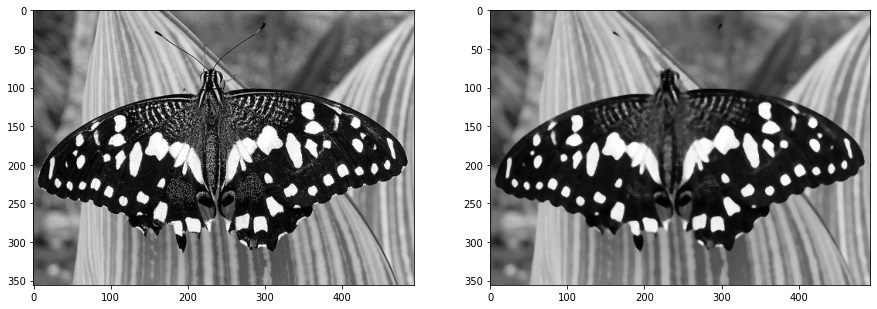

In [7]:
median = cv2.medianBlur(im, 5)
f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(median, cmap='gray')
plt.show()

# Realce

OpenCV no incluye ningún algoritmo de realce. Estes algoritmos consisten en una secuencia de pasos sencillos facilmente implementable con operaciones de las librerías numpy y OpenCV.

## Unsharp masking
Una de las versiones de este algoritmo consiste en los siguientes pasos:

1. Aplicar un filtro paso bajo a la imagen original, por ejemplo, un filtro de medias 3x3
2. Aplicar una compresión de histograma a la imagen suavizada.
3. Sustraer la imagen comprimida a la imagen original
4. Aplicar un estiramiento de histograma a la imagen resultante.


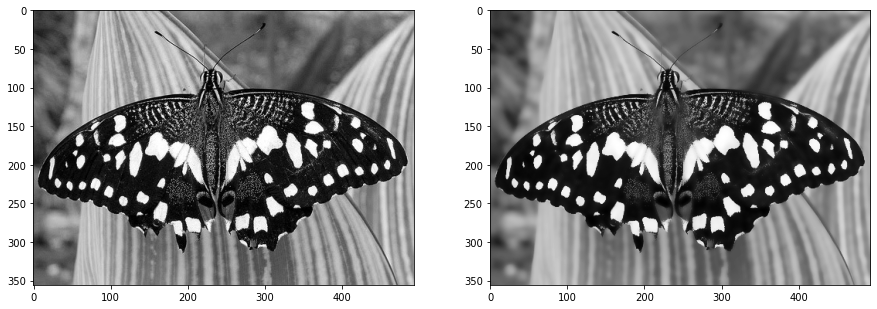

In [8]:
bil = cv2.bilateralFilter(im, 9, 50, 50)
f, ax = plt.subplots(1,2)

ax[0].imshow(im, cmap='gray')
ax[1].imshow(bil, cmap='gray')
plt.show()

0.2 0.4
-0.07619164820740018 0.4268520797440315


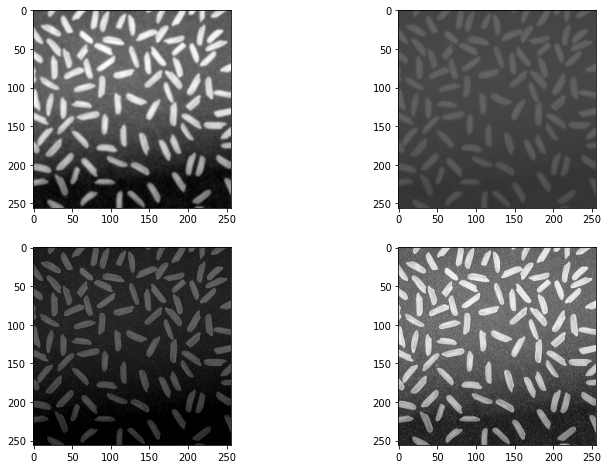

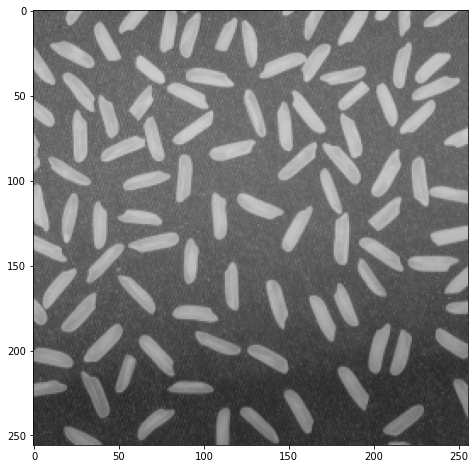

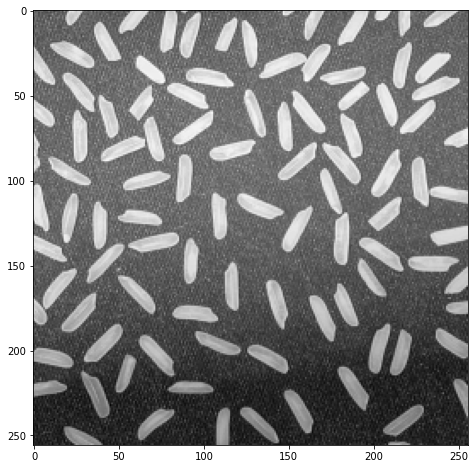

In [9]:
from skimage.exposure import rescale_intensity
plt.rcParams["figure.figsize"] = [12,8]

im = cv2.imread("res/rice.png",cv2.IMREAD_GRAYSCALE)
im = im.astype(float) / 255.0
# Paso 1: Aplicar filtro de medias 3x3
blur = cv2.blur(im, (3,3))

# Paso 2: Aplicar una compresión de histograma a la imagen suavizada
compress = rescale_intensity(blur, in_range='image', out_range=(0.2, 0.4))
print (np.min(compress), np.max(compress))

# Paso 3: Sustraer la imagen comprimida a la imagen original
diff = im - compress
print (np.min(diff), np.max(diff))

# Paso 4: Aplicar un estiramiento de histograma a la imagen resultante
out = rescale_intensity(diff, in_range='image', out_range=(0.0, 1.0))

f, ax = plt.subplots(2,2)
ax[0,0].imshow(blur,cmap='gray')
ax[0,1].imshow(compress,cmap='gray',vmin=0, vmax=1)
ax[1,0].imshow(diff, cmap='gray',vmin=0, vmax=1)
ax[1,1].imshow(out, cmap='gray',vmin=0, vmax=1)
plt.show()

plt.imshow(im, cmap='gray',vmin=0, vmax=1)
plt.show()
plt.imshow(out, cmap='gray',vmin=0, vmax=1)
plt.show()

### Ejercicio
Implementar el algoritmo rank-based sharpening utilizando como base el código del algoritmo unsharp masking y cambiando el filtro de medias por un filtro de orden como, por ejemplo, un filtro de medianas. Visualiza las imágenes resultantes de cada paso y compara los resultados finales de ambos algoritmos.

	 Imágenes resultantes de cada etapa del algoritmo rank-based sharpening:


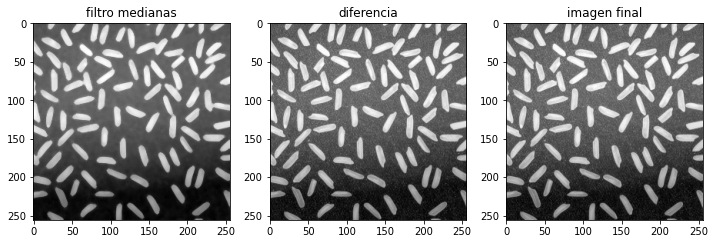

	 Resultados obtenidos anteriormente con el algoritmo unsharp masking:


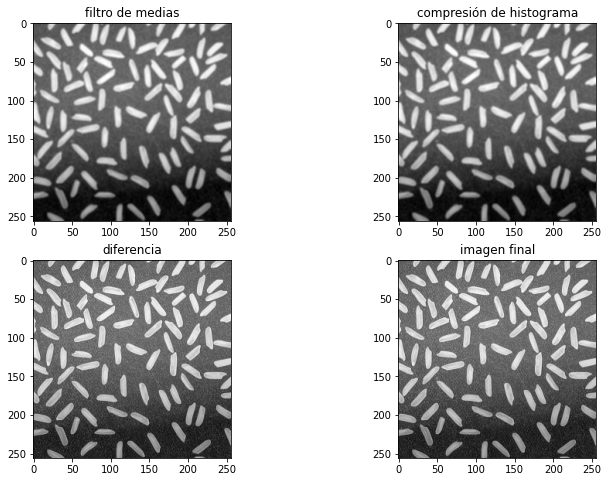

	 Comparación de imágenes resultantes de cada algoritmo:


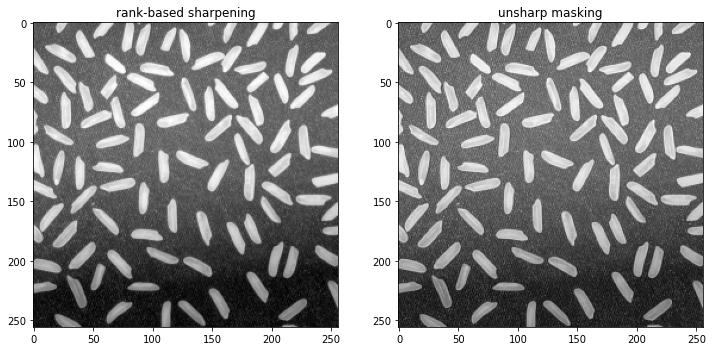

In [27]:
# El algoritmo rank-based sharpening consta de los siguientes pasos:

# 1.) Aplicación de un filtro de orden (como un filtro de medianas) en la imagen.
# 2.) Sustraer la imagen filtrada a la imagen original.
# 3.) Sumar la imagen diferencia obtenida con la imagen original.

from skimage.exposure import rescale_intensity

# Carga de la imagen
im = cv2.imread("res/rice.png",cv2.IMREAD_GRAYSCALE)
# Paso 1: Aplicar filtro de medianas en la imagen:
median_rice = cv2.medianBlur(im, 5)

# Se lleva a cabo la conversión a flotante:
float_median_rice = median_rice.astype(float) / 255.0

# Paso 2: Sustraer la imagen filtrada a la imagen original:
diferencia = im - float_median_rice

# Paso 3: Sumar la imagen diferencia obtenida con la imagen original:
imagen_suma_final = diferencia + im

# Visualización de las imágenes resultantes en cada paso:
print('\t Imágenes resultantes de cada etapa del algoritmo rank-based sharpening:')
f, ax = plt.subplots(1,3)
ax[0].imshow(median_rice,cmap='gray')
ax[0].set_title('filtro medianas')
ax[1].imshow(diferencia,cmap='gray')
ax[1].set_title('diferencia')
ax[2].imshow(imagen_suma_final, cmap='gray')
ax[2].set_title('imagen final')
plt.show()

# Resultados del algoritmo unsharp masking:
print('\t Resultados obtenidos anteriormente con el algoritmo unsharp masking:')
f, ax = plt.subplots(2,2)
ax[0,0].imshow(blur,cmap='gray')
ax[0,0].set_title('filtro de medias')
ax[0,1].imshow(compress,cmap='gray')
ax[0,1].set_title('compresión de histograma')
ax[1,0].imshow(diff, cmap='gray')
ax[1,0].set_title('diferencia')
ax[1,1].imshow(out, cmap='gray')
ax[1,1].set_title('imagen final')
plt.show()

# Comparación de imágenes finales:
print('\t Comparación de imágenes resultantes de cada algoritmo:')
f, ax = plt.subplots(1,2)
ax[0].imshow(imagen_suma_final,cmap='gray')
ax[0].set_title('rank-based sharpening')
ax[1].imshow(out,cmap='gray')
ax[1].set_title('unsharp masking')
plt.show()



En lo que respecta a la comparación de los resultados obtenidos por los dos algoritmos, cabe destacar que la imagen final de salida en el unsharp masking muestra una mejora de las regiones que son más uniformes en la imagen original, lo que coincide con lo esperado, pues el fundamento de este algoritmo consiste en que las regiones que son más uniformes en la imagen original se destacan. Por su parte, la imagen final del algoritmo rank-based-sharpening muestra un mayor contraste en el borde de los objetos y una mayor uniformidad de la imagen en términos generales

# Operadores morfológicos

Los operadores morfológicos operan en la forma de la imagen. Normalmente se aplican sobre imágenes binarias (blanco/negro) y necesitan dos entradas, la imagen original y lo que se denomina elemento estructurante. Dicho elemento estructurante es un kernel que determina la naturaleza de la operación a realizar. 


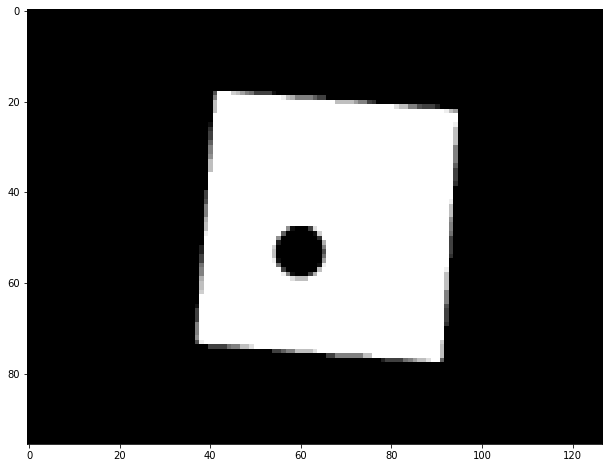

In [15]:
im = cv2.imread('res/morph1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(im,cmap='gray')
plt.show()

## Elemento estructurante
Un elemento estructurante es un kernel formado por 1 y 0 que determina la forma con la que se aplicará el operador morfológico. Podemos crear los elementos estructurantes a través de matrices numpy o bien utilizar una función propia de OpenCV

In [16]:
kernel = np.ones((5,5), np.uint8)
print(kernel)

# Circular
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print ('\n El circular es: \n', kernel)

# Cruz
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
print ('\n La cruz es: \n',kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

 El circular es: 
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

 La cruz es: 
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


## Erosión y dilatación
La erosión es una de las operaciones morfológicas básicas. Como su propio nombre indica, su efecto es "erosionar" las paredes de los objetos de primer plano (blanco). En la imagen resultado un pixel tomará valor 1 sólo si todos los píxeles bajo el elemento estructurante tienen también valor 1.

La dilatación es el proceso inverso a la erosión. Si al menos un pixel de la imagen original tiene valor 1 bajo el elemento estructurante, el pixel tomará valor 1 en la imagen resultante. Por tanto, esta operación sirve para rellenar huecos en el objeto de primer plano (blanco).

Las funciones `erode` y `dilate` toman tres parámetros:
- La imagen original binaria
- El elemento estructurante
- En número de iteraciones que se aplicará la operación

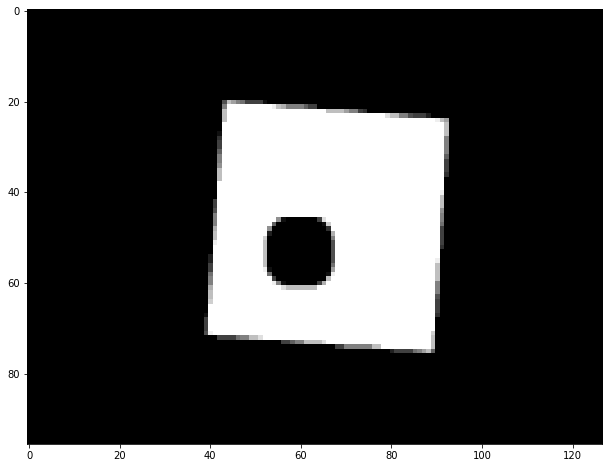

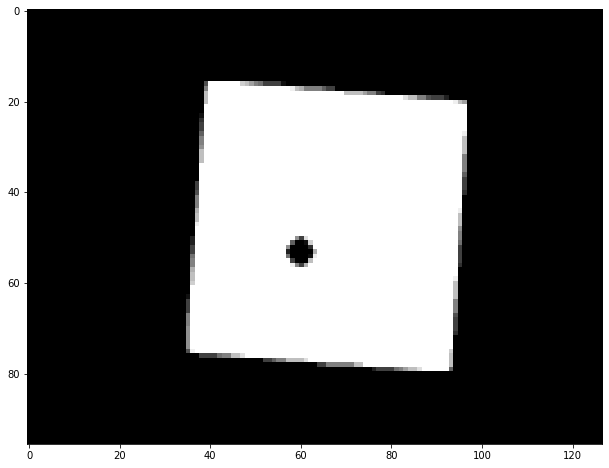

In [17]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(im, kernel, iterations=1)
plt.imshow(erosion,cmap='gray')
plt.show()

kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(im, kernel, iterations=1)
plt.imshow(dilation,cmap='gray')
plt.show()

### Ejercicios

1) Erosiona la imagen `res/morph1.png` durante 10 iteraciones. Qué ocurre?

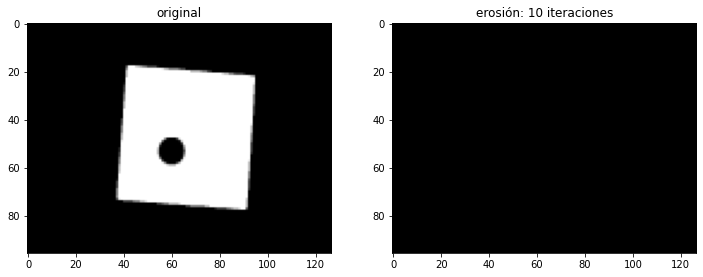

In [19]:
# Erosión de morph1.png durante 10 iteraciones:
kernel = np.ones((5,5), np.uint8)
erosion_10 = cv2.erode(im, kernel, iterations=10)

# Visualización de resultados:
f, ax = plt.subplots(1,2)

ax[0].imshow(im, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(erosion_10, cmap='gray')
ax[1].set_title('erosión: 10 iteraciones')
plt.show()


Como consecuencia de las iteraciones realizadas, la simplificación de la estructura de los objetos conduce a una eliminación de todos los detalles de la imagen.

2) Rellena el hueco circular la imagen `res/morph1.png` utilizando dilataciones. Qué ocurre con los bordes externos del cuadrado?


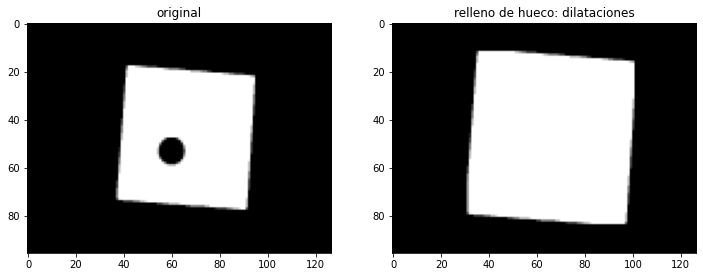

In [20]:
# Dilatación de morph1.png para rellenar el hueco circular:
kernel = np.ones((5,5), np.uint8)
relleno_hueco = cv2.dilate(im, kernel, iterations=3) # Se determinan 3 iteraciones precisas 

# Visualización de resultados:
f, ax = plt.subplots(1,2)

ax[0].imshow(im, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(relleno_hueco, cmap='gray')
ax[1].set_title('relleno de hueco: dilataciones')
plt.show()

Aplicando 3 iteraciones para efectuar la dilatación en la imagen y rellenar el hueco, se puede observar la expansión de los bordes externos del cuadrado, acompañado de una curvatura y suavización de los salientes.

## Otros operadores

La función `morphologyEx` se utiliza para aplicar otros operadores morfológicos derivados de erosiones y dilataciones. Esta función toma los siguientes parámetros:

- Imagen original binaria
- El tipo de operación a realizar (`cv2.MORPH_OPEN`, `cv2.MORPH_CLOSE`, `cv2.MORPH_TOPHAT`, `cv2.MORPH_BLACKHAT`, `cv2.MORPH_GRADIENT`)
- El elemento estructurante

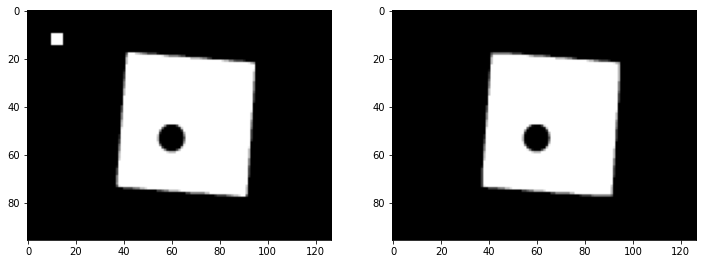

In [23]:
im2 = im * 1
im2[10:15, 10:15] = 255 # Creamos un cuadrado en la imagen

kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(im2, cv2.MORPH_OPEN, kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im2,cmap='gray')
ax[1].imshow(opening,cmap='gray')
plt.show()

### Ejercicio

Rellena el hueco de la imagen `res/morph1.png` sin alterar el tamaño del objeto.

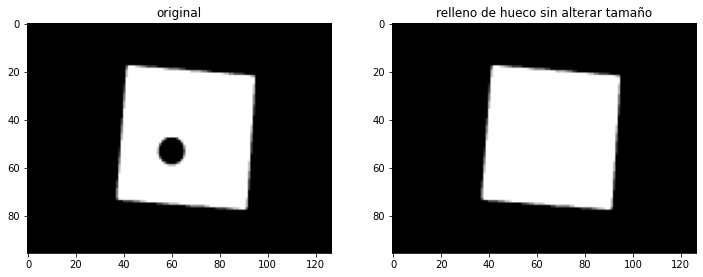

In [24]:
# Se plantea un kernel en forma de cuadrado de tamaño 11x11:
kernel = np.ones((11,11), np.uint8)

# Se lleva a cabo un cierre con el fin de eliminar el hueco y rellenar el espacio:
relleno_morph = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)

# Visualización de los resultados:
f, ax = plt.subplots(1,2)

ax[0].imshow(im, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(relleno_morph, cmap='gray')
ax[1].set_title('relleno de hueco sin alterar tamaño')
plt.show()